In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [2]:
df_cancer = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 28 - Breast Cancer Classification\data.csv')
df = df_cancer.copy()

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# drop column 'Unnamed: 32', transform diagnosis into num
df = df.drop(columns= ['Unnamed: 32'])
df['diagnosis'] = df.diagnosis.apply(lambda x : 1 if x == 'M' else 0)


In [6]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [7]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
target_cols = df.drop(columns= ['id'])
target_cols.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
# Multicollinear columns

corr_matrix = target_cols.corr()

# Get upper triangle
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
filtered = corr_matrix.where(upper)

# Get pairs > 0.90
high_pairs = filtered[(filtered > 0.90) & (filtered < 1.00)].stack().reset_index()
high_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_pairs = high_pairs.sort_values('Correlation', ascending=False)

# Add correlation with diagnosis for each feature
high_pairs['Feature_1_Diagnosis'] = high_pairs['Feature_1'].map(corr_matrix['diagnosis'])
high_pairs['Feature_2_Diagnosis'] = high_pairs['Feature_2'].map(corr_matrix['diagnosis'])

high_pairs

# Drop redundant size features (radius, area, perimeter are 95-99% correlated)
# Keep only perimeter_worst as it has highest correlation with diagnosis (0.783)

# Drop redundant SE size features (radius_se, perimeter_se, area_se are 93-97% correlated)
# Keep only radius_se as it has highest correlation with diagnosis (0.567)

# Drop concavity_mean (92% correlated with concave points_mean)
# Keep concave points_mean as it has higher correlation with diagnosis (0.777 vs 0.696)

# Drop concave points_mean (91% correlated with concave points_worst)
# Keep concave points_worst as it has highest correlation with diagnosis (0.794 - best predictor!)

# Drop texture_mean (91% correlated with texture_worst)
# Keep texture_worst as it has higher correlation with diagnosis (0.457 vs 0.415)

,Feature_1,Feature_2,Correlation,Feature_1_Diagnosis,Feature_2_Diagnosis
0,radius_mean,perimeter_mean,0.997855,0.730029,0.742636
18,radius_worst,perimeter_worst,0.993708,0.776454,0.782914
1,radius_mean,area_mean,0.987357,0.730029,0.708984
6,perimeter_mean,area_mean,0.986507,0.742636,0.708984
19,radius_worst,area_worst,0.984015,0.776454,0.733825
20,perimeter_worst,area_worst,0.977578,0.782914,0.733825
15,radius_se,perimeter_se,0.972794,0.567134,0.556141
8,perimeter_mean,perimeter_worst,0.970387,0.742636,0.782914
2,radius_mean,radius_worst,0.969539,0.730029,0.776454
7,perimeter_mean,radius_worst,0.969476,0.742636,0.776454


In [10]:
features_to_drop = [
    'radius_mean',
    'radius_worst',
    'perimeter_mean',
    'area_mean',
    'area_worst',
    'perimeter_se',
    'area_se',
    'concavity_mean',
    'concave points_mean',
    'texture_mean'

]

df = df.drop(columns=features_to_drop)

In [11]:
df.corr()

,id,diagnosis,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,...,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.096781,0.033961,...,-0.017306,0.025725,0.064720,0.079986,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.358560,0.596534,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,...,-0.006522,0.077972,0.456903,0.782914,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
smoothness_mean,-0.012968,0.358560,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,...,0.200774,0.283607,0.036072,0.238853,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,...,0.229977,0.507318,0.248133,0.590210,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
symmetry_mean,-0.022114,0.330499,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,...,0.449137,0.331786,0.090651,0.219169,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.052511,-0.012838,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,...,0.345007,0.688132,-0.051269,-0.205151,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
radius_se,0.143048,0.567134,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,...,0.240567,0.227754,0.194799,0.719684,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559
texture_se,-0.007526,-0.008303,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,...,0.411621,0.279723,0.409003,-0.102242,-0.073658,-0.092439,-0.068956,-0.119638,-0.128215,-0.045655
smoothness_se,0.096781,-0.067016,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,...,0.413506,0.427374,-0.074743,-0.217304,0.314457,-0.055558,-0.058298,-0.102007,-0.107342,0.101480
compactness_se,0.033961,0.292999,0.318943,0.738722,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,...,0.394713,0.803269,0.143003,0.260516,0.227394,0.678780,0.639147,0.483208,0.277878,0.590973


In [12]:
# Count outliers using IQR method
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Check each feature
outlier_summary = pd.DataFrame({
    'Feature': df.drop(columns=['diagnosis', 'id']).columns,
    'Outlier_Count': [count_outliers(df, col) for col in df.drop(columns=['diagnosis', 'id']).columns]
}).sort_values('Outlier_Count', ascending=False)

print(outlier_summary)
print(f"\nTotal rows: {len(df)}")

                    Feature  Outlier_Count
4                 radius_se             38
6             smoothness_se             30
11     fractal_dimension_se             28
7            compactness_se             28
10              symmetry_se             27
19  fractal_dimension_worst             24
18           symmetry_worst             23
8              concavity_se             22
5                texture_se             20
9         concave points_se             19
15        compactness_worst             16
1          compactness_mean             16
2             symmetry_mean             15
3    fractal_dimension_mean             15
13          perimeter_worst             15
16          concavity_worst             12
14         smoothness_worst              7
0           smoothness_mean              6
12            texture_worst              5
17     concave points_worst              0

Total rows: 569


In [13]:
X = df.drop(columns = ['diagnosis', 'id'])
y = df.diagnosis

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2, stratify= y)

In [15]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state= 2),
        'params': {
            'C': [0.01, 0.05, 0.1],
            'penalty': ['l2'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(random_state= 2),
        'params':{
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', None],
            'n_estimators': [100, 200],
            'class_weight': ['balanced']
        }
    },
    'SVC': {
        'model': SVC(random_state= 2),
        'params':{
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'class_weight': ['balanced']
        }
    },
    'XGBoost':{
        'model': XGBClassifier(random_state = 2),
        'params': {
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'min_child_weight': [5, 10],
            'subsample': [0.6, 0.7],
            'n_estimators': [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1, 2]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=2, verbose=-1),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'num_leaves': [31, 50],
            'min_child_samples': [20, 30],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'class_weight': ['balanced']
        }
    },
    
    'CatBoost': {
        'model': CatBoostClassifier(random_state=2, verbose=0),
        'params': {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8],
            'l2_leaf_reg': [1, 3, 5],
            'auto_class_weights': ['Balanced']
        }
    }
}

In [17]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'f1',
        n_jobs = -1,
        verbose= 1
    )

    grid_search.fit(X_train_scaled, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train_scaled)
    test_pred = grid_search.best_estimator_.predict(X_test_scaled)

    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params ': grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1': f1_score(y_train, train_pred),
        'Test F1': f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred)

    }

best_model_name = max(results.keys(), key = lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best_model']

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  

In [18]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Overfit Gap': result['Train F1'] - result ['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test F1', ascending = False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Train F1,Test F1,Overfit Gap,Precision,Recall
4,LightGBM,1.0000,0.9383,0.0617,0.9744,0.9048
5,CatBoost,1.0000,0.9383,0.0617,0.9744,0.9048
2,SVC,0.9765,0.9250,0.0515,0.9737,0.8810
0,Logistic Regression,0.9617,0.9250,0.0367,0.9737,0.8810
1,Random Forest,0.9853,0.9157,0.0697,0.9268,0.9048
3,XGBoost,0.9822,0.9048,0.0775,0.9048,0.9048


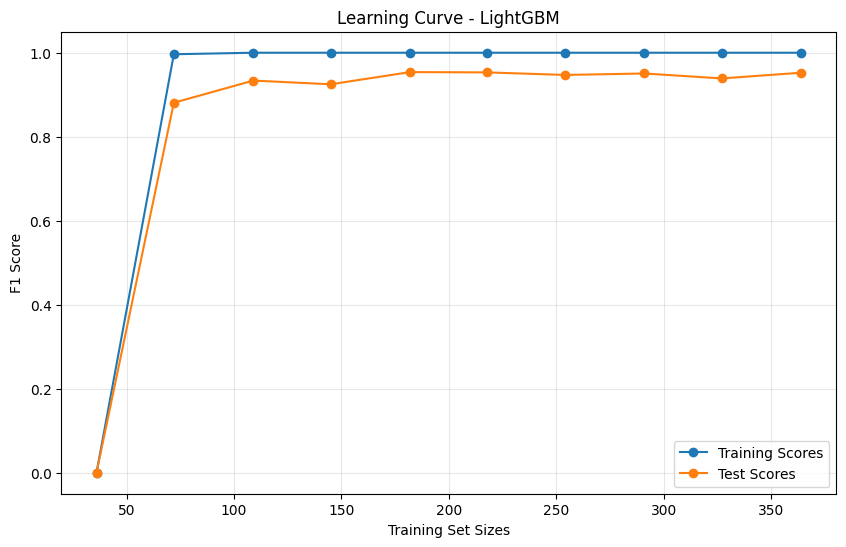

In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train_scaled, y_train,
    cv = 5,
    scoring = 'f1',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs = -1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis =1), label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores.mean(axis =1), label = 'Test Scores', marker = 'o')
plt.xlabel('Training Set Sizes')
plt.ylabel('F1 Score')
plt.title(f'Learning Curve - {best_model_name}')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [22]:
cv_scores = cross_val_score(
    best_model,
    X_train_scaled, y_train,
    cv = 5,
    scoring = 'f1'
)

print(f'CV F1 Scores: {cv_scores}')
print(f'Mean: {cv_scores.mean():.3f}')
print(f'Std: {cv_scores.std():.3f}')

c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CV F1 Scores: [0.92537313 0.93939394 0.96969697 0.96969697 0.95774648]
Mean: 0.952
Std: 0.017


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [31]:
# Adjust threshold to increase recall
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Find threshold for 95% recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
target_recall = 0.95
idx = np.argmin(np.abs(recalls - target_recall))

print(f"For 95% recall:")
print(f"Threshold: {thresholds[idx]:.3f}")
print(f"Precision: {precisions[idx]:.3f}")
print(f"Recall: {recalls[idx]:.3f}")


For 95% recall:
Threshold: 0.008
Precision: 0.870
Recall: 0.952


c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



## 📊 Precision, Recall, and Threshold Tuning Results

### Core Concepts

**Threshold:** The probability cutoff where the model decides "cancer" vs "no cancer"
- Model outputs probabilities (0-100% chance of cancer)
- Default threshold: **0.5** (50%)
- Our tuned threshold: **0.008** (0.8%) - more sensitive!

**RECALL (Sensitivity):**
*"Out of all people who ACTUALLY have cancer, how many did we catch?"*
```
Recall = Detected Cancers / Total Actual Cancers
```
→ Measures how good we are at finding cancer when it exists

**PRECISION (Positive Predictive Value):**
*"Out of all our CANCER predictions, how many were correct?"*
```
Precision = Correct Cancer Predictions / Total Cancer Predictions
```
→ Measures how accurate we are when we say "cancer"

---

### Our Results with Threshold 0.008

**Recall = 95.2%**
- We catch 95 out of every 100 cancer cases
- Only 5 cancer cases slip through undetected

**Precision = 87.0%**
- When we say "cancer", we're right 87% of the time
- 13 out of 100 predictions are false alarms

---

### Real-World Impact

Screening **100 patients** (50 with cancer, 50 healthy):

**BEFORE (Default threshold = 0.5):**
```
Model predicts "Cancer" for 48 people:
  ✅ 45 actually have cancer (TRUE POSITIVES)
  ❌ 3 are healthy (FALSE POSITIVES - false alarm)
  
Model predicts "Healthy" for 52 people:
  ✅ 47 are healthy (TRUE NEGATIVES)
  💀 5 have cancer (FALSE NEGATIVES - MISSED!)

Results:
  Precision: 97.4% (very accurate)
  Recall: 90.5% (misses 10% of cancers)
  → 5 cancer patients go home undetected
```

**AFTER (Tuned threshold = 0.008):**
```
Model predicts "Cancer" for 55 people:
  ✅ 48 actually have cancer (TRUE POSITIVES)
  ❌ 7 are healthy (FALSE POSITIVES - false alarm)
  
Model predicts "Healthy" for 45 people:
  ✅ 43 are healthy (TRUE NEGATIVES)
  💀 2 have cancer (FALSE NEGATIVES - MISSED!)

Results:
  Precision: 87.0% (still accurate)
  Recall: 95.2% (catches 95% of cancers!)
  → Only 2 cancer patients missed (saved 3 lives!)
  → 4 more false alarms (acceptable trade-off)
```

---

### The Trade-Off

| Metric | Default (0.5) | Tuned (0.008) | Change |
|--------|---------------|---------------|--------|
| **Recall** | 90.5% | 95.2% | +4.7% ✅ |
| **Precision** | 97.4% | 87.0% | -10.4% ⚠️ |
| **Missed Cancers** (per 50) | 5 | 2 | **-3 (Lives saved!)** |
| **False Alarms** (per 50) | 3 | 7 | +4 (More tests) |

**Improvement:** Catch 3 more cancer cases at the cost of 4 more false alarms

---

### Why High Recall Matters for Cancer

**Missing cancer (Low Recall):**
- ❌ Patient doesn't get treatment
- ❌ Cancer progresses to advanced stages
- ❌ Could be fatal
- **Cost: Lives lost**

**False alarm (Low Precision):**
- ⚠️ Patient gets extra mammogram/biopsy
- ⚠️ Temporary stress
- ✅ Finds out they're healthy
- **Cost: Money and worry**

**Conclusion:** For cancer screening, catching more cancers (high recall) is more important than avoiding false alarms (high precision).

---

### Bottom Line

✅ **With threshold 0.008, we catch 95% of cancers (vs 90.5% with default)**  
✅ **This means 3 more lives saved per 50 cancer patients**  
⚠️ **Trade-off: 4 more false alarms (acceptable for cancer screening)**  
🎯 **Recommendation: Use 0.008 threshold because saving lives > avoiding false alarms**

**In medical diagnosis, it's better to be safe than sorry. A false alarm leads to extra tests, but a missed cancer can be fatal.**
```